In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tslearn import metrics

In [2]:
import MixedCoordinates
import GCC2
import Transforms

# Loading Data

In [3]:
np.random.seed(123)

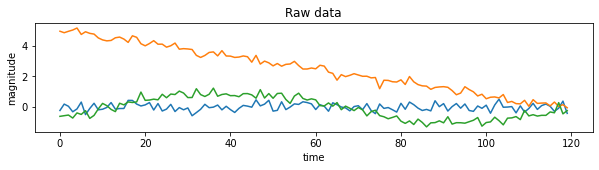

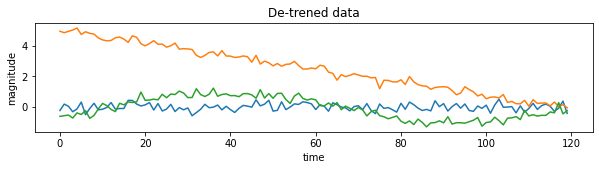

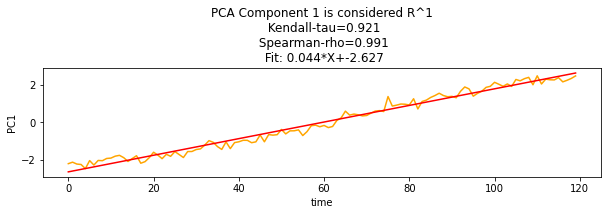

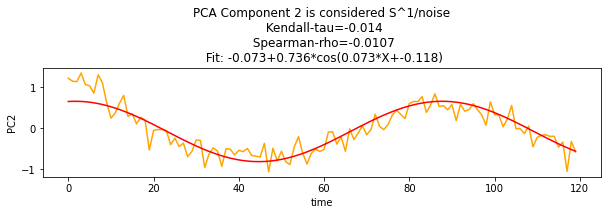

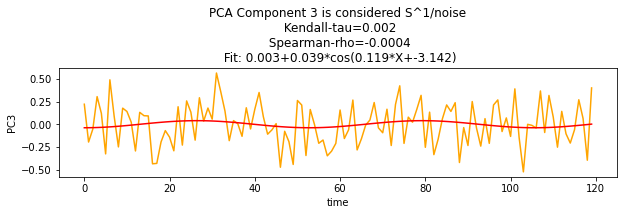

In [4]:
#SIGNAL: (noise, -2t + noise, sin(7t) + noise)
X_d1 = np.random.normal(size=(3,120), scale=0.2)
X_d1[0,:] = X_d1[0,:] #+ np.linspace(0, 10, 100)
X_d1[1,:] = X_d1[1,:] + (-5) * np.linspace(-1, 0, 120) #+ np.linspace(0, 10, 100)
X_d1[2,:] = X_d1[2,:] + 1 * np.sin(7 * np.linspace(-1, 0, 120))
mix_d1 = MixedCoordinates.MixedCoordinates(data_matrix=X_d1.T, n_comp=3,
      detrend=False, get_fits=True, kendall_threshold=0.5)
#mix_d1_detrended = MixedCoordinates(data_matrix=X_d1, n_comp=5, detrend=True, get_fits=True)

#print(mix_d1['detrended_matrix'])

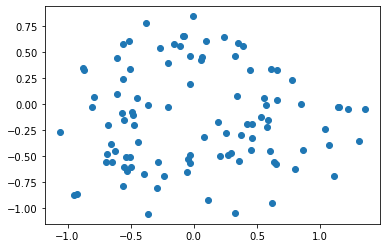

In [5]:
X_S = np.vstack((mix_d1['S1array'][0:100, 0], mix_d1['S1array'][20:120, 0])).T
plt.plot(X_S[:, 0], X_S[:, 1], 'o')

Output file: temp_output.pdf 

>>>>>>Start Time(VR computation): 2021-12-09 17:02:22
Base coefficient field: Z/23Z
Maximal scale: 2.0
Persistence threshold for selecting significant cocycles: 0.2
>>>>>>End Time (VR-computation): 2021-12-09 17:02:23


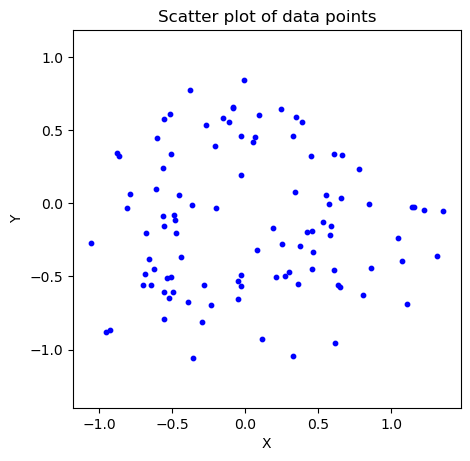

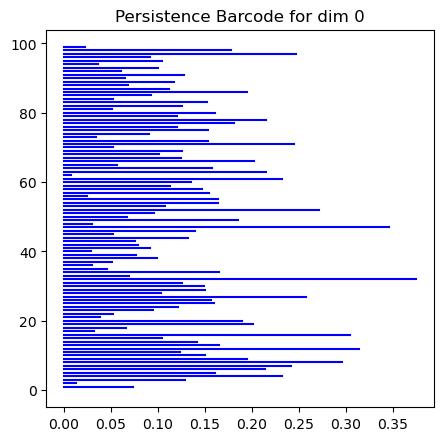

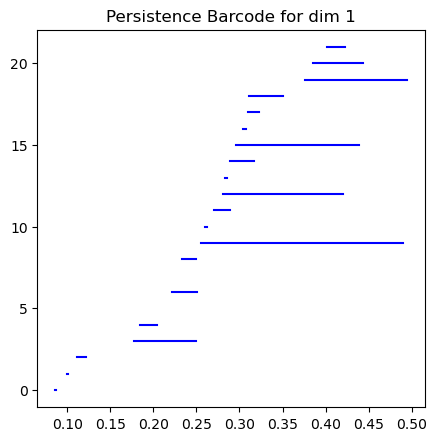

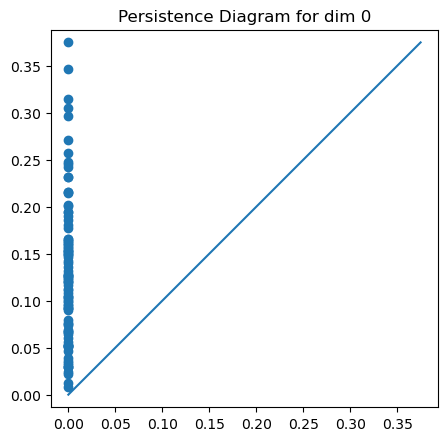

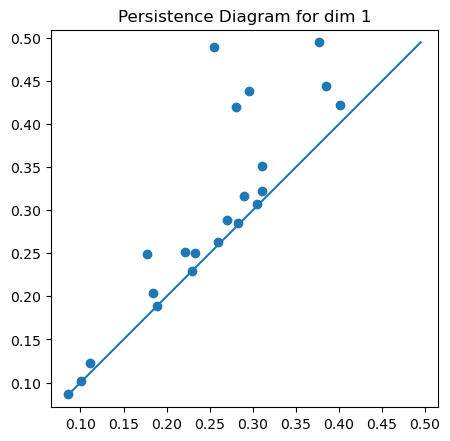

>>>>>>Selected significant features:
(0.254853,0.489957) 	persistence =  0.23510372638702393

Constant edges, with coordinates difference < 1e-05
Optimizer maximal iteration steps= 1000
>>>>>> Start Time (GCC computation): 2021-12-09 17:02:24
>>>>>> lambda =  0.5 . => Analysis of Circular coordinates 
 (mod 23 - 0.5*L2 + 0.5*L2)
Penalty function =>0.5*L^2+0.5*L^2
Before optim cost: 2.0057355174748643
After  optim cost: 2.0057355259554983  in  1000  steps
Penalty function =>0.5*L^2+0.5*L^2 Coordinates=>temp_CircularCoordinates_0.5_0.txt
Penalty function =>0.5*L^2+0.5*L^2 Embeddings=>temp_Embedding_0.5.txt
>>>>>> End Time (GCC computation): 2021-12-09 17:02:27


In [6]:
color, embedding = GCC2.GCC2(dataset=X_S, filenam="temp", threshold=.2,
      maxscale=2., toll=1e-5, lp=2, lq=2, Nsteps=1000, lambda_list=[0.5])

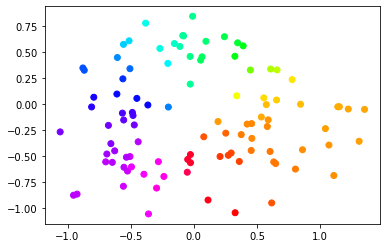

In [7]:
plt.scatter(X_S[:, 0], X_S[:, 1], c=color, cmap="hsv")
plt.savefig('circular_coordinate_color.png', bbox_inches='tight')

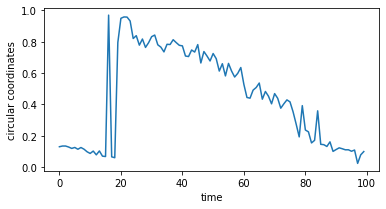

In [8]:
plt.figure(figsize=(6, 3))
plt.plot(color)
plt.xlabel('time')
plt.ylabel('circular coordinates')
plt.savefig('circular_coordinate_plot.png', bbox_inches='tight')

# Metrics of circular coordinates

After computing circular coordinates from periodic components, we need a metric between circular coordinates to reflect the topological resemblance of circular coordinates.

Let $t=(t_{1},\ldots,t_{n}),t'=(t'_{1},\ldots,t'_{m})$ be two sequences of time series indices, and let $c(t),c'(t)\in\mathbb{R}^{n}, \tilde{c}(t'),\tilde{c}'(t')\in\mathbb{R}^{m}$ be circular coordinates of possibly different lengths. There are several desired properties that a metric $d$ between two
circular coordinates should satisfy:
1. Mod 1 invariance, that is, the distance is invariant under Mod 1: i.e., for circular coordinates $c(t),c'(t)\in \mathbb{R}^{n},t=t_1,\cdots,t_n$ and $\tilde{c}(t'),\tilde{c}'(t')\in \mathbb{R}^{m},t'=t'_1,\cdots,t'_m$, if $c=c'\pmod1$ and $\tilde{c}=\tilde{c}'\pmod1$ then $d(c,\tilde{c})=d(c',\tilde{c}')$. This is because the value of circular parts are all supposed to be on $S^1$.
2. Inversion invariance, if $c(t_{i+1})-c(t_{i})=-(c'(t_{i+1})-c'(t_{i}))$ for all $i$, then $d(c,c')=0$. 
3. Translation invariance, for any $a,b\in\mathbb{R}$, $d(c+a,\tilde{c}+b)=d(c,\tilde{c})$. 

In [9]:
c1 = color
c2 = 2 * c1[0] - c1

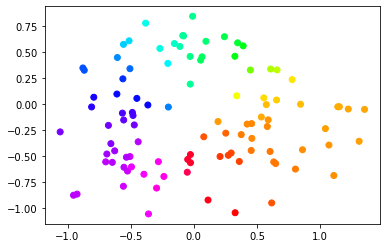

In [10]:
plt.scatter(X_S[:, 0], X_S[:, 1], c=(Transforms.T_M(c1) % 1.0), cmap="hsv")
plt.savefig('circular_coordinate_color_mod1.png', bbox_inches='tight')

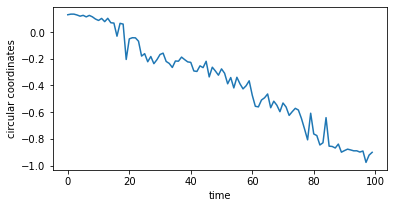

In [11]:
plt.figure(figsize=(6, 3))
plt.plot(Transforms.T_M(c1))
plt.xlabel('time')
plt.ylabel('circular coordinates')
plt.savefig('circular_coordinate_plot_mod1.png', bbox_inches='tight')

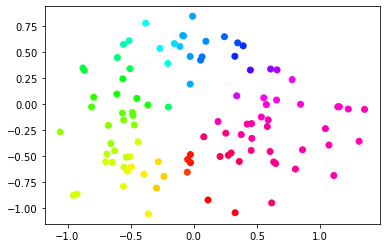

In [12]:
plt.scatter(X_S[:, 0], X_S[:, 1], c=c2, cmap="hsv")
plt.savefig('circular_coordinate_color_inverse.png', bbox_inches='tight')

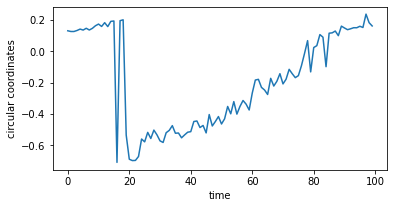

In [13]:
plt.figure(figsize=(6, 3))
plt.plot(c2)
plt.xlabel('time')
plt.ylabel('circular coordinates')
plt.savefig('circular_coordinate_plot_inverse.png', bbox_inches='tight')

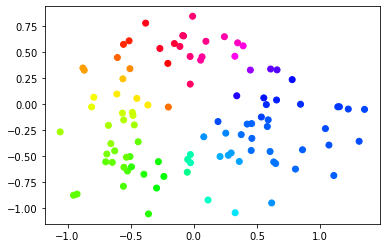

In [14]:
plt.scatter(X_S[:, 0], X_S[:, 1], c=(c1+0.5) % 1.0, cmap="hsv")
plt.savefig('circular_coordinate_color_translate.png', bbox_inches='tight')

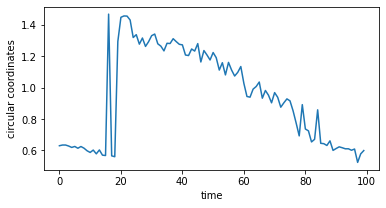

In [15]:
plt.figure(figsize=(6, 3))
plt.plot(c1+0.5)
plt.xlabel('time')
plt.ylabel('circular coordinates')
plt.savefig('circular_coordinate_plot_translate.png', bbox_inches='tight')

For (1), we define a transform on circular coordinates as shifting the circular coordinate values so that the neighboring values are always close enough, i.e., to satisfy that $-0.5<c_{i+1}-c_{i}\leq0.5$. For this, we define the transform $T_{M}$ as: 
1. $(T_{M}(c))(t_0)=c(t_0)$ 
2. $(T_{M}(c))(t_{i+1})=c(t_{i+1})+k$ for $k\in\mathbb{Z}$ that satisfies $-0.5<(T_{M}(c))(t_{i+1})-(T_{M}(c))(t_{i})\leq0.5$.

For (2), we define a transform on circular coordinates as inverting the circular values so that $c(t_{n-1})-c(t_{0})$ is
always positive. For this, we define the transform $T_{I}$ as: 
1. if $c(t_{n-1})>c(t_{0})$, then $T_{I}(c)=c$. 
2. if $c(t_{n-1})<c(t_{0})$, then $(T_{I}(c))(t_{0})=c(t_{0})$ and $(T_{I}(c))(t_{i+1})=(T_{I}(c))(t_{i})+c(t_{i})-c(t_{i+1})$.

For (3), given a metric between two vectors, we define a transform on the metric as follows: the transformed metric compares the circular coordinates $c$ to the circular coordinates $\tilde{c}+a$ for $a$ varying from $\min{c}-\min{\tilde{c}}$ to $\max{c}-\max{\tilde{c}}$. In other words, it is to add the offset before comparing two circular coordinates and return the minimum possible distance. Precisely, we define a transform $T_{L}$ as: 
$$
T_{L}(d)(c,\tilde{c})= 
\min_{\min{c}-\min{\tilde{c}}\leq a \leq \max{c}-\max{\tilde{c}}}d(c,\tilde{c}+a).
$$
This makes it a 1-dimensional optimization problem: just find the offset that minimizes the signal difference.

Combining $T_{M}$, $T_{I}$ and $T_{L}$ into $\Phi$ as 
$$
\Phi(d)(c,\tilde{c}):=T_{L}(d)(T_{I}\circ T_{M}(c),T_{I}\circ T_{M}(\tilde{c}))
$$
We obtain a transform that satisfies (1), (2), and (3). In other words, $c=c'\pmod1$ and $\tilde{c}=\tilde{c}'\pmod1$ then $\Phi(d)(c,\tilde{c})=\Phi(d)(c',\tilde{c}')$, if $c(t_{i+1})-c(t_{i})=-(c'(t_{i+1})-c'(t_{i}))$ for all $i$ then $\Phi(d)(c,c')=0$, and for any $a,b\in\mathbb{R}$, $\Phi(d)(c+a,\tilde{c}+b)=\Phi(d)(c,\tilde{c})$.

Then any metric for two vectors applied with $T_{I} \circ T_{M}$ would satisfy (1) and (2). In other words, $c=c'\pmod1$ and $\tilde{c}=\tilde{c}'\pmod1$ then $d(T_{I} \circ T_{M}(c),T_{I} \circ T_{M}(\tilde{c}))=d(T_{I} \circ T_{M}(c'),T_{I} \circ T_{M}(\tilde{c}'))$,
if $c(t_{i+1})-c(t_{i})=-(c'(t_{i+1})-c'(t_{i}))$ for all $i$ then $d(T_{I} \circ T_{M}(c),T_{I} \circ T_{M}(c'))=0$.

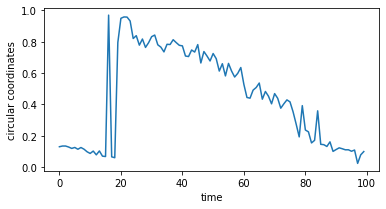

In [16]:
plt.figure(figsize=(6, 3))
plt.plot(c1)
plt.xlabel('time')
plt.ylabel('circular coordinates')
plt.savefig('metric_transform_1_before.png', bbox_inches='tight')

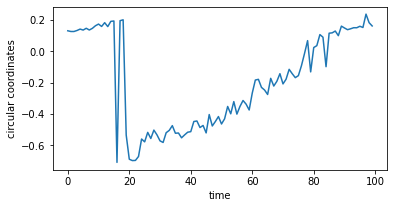

In [17]:
plt.figure(figsize=(6, 3))
plt.plot(c2)
plt.xlabel('time')
plt.ylabel('circular coordinates')
plt.savefig('metric_transform_2_before.png', bbox_inches='tight')

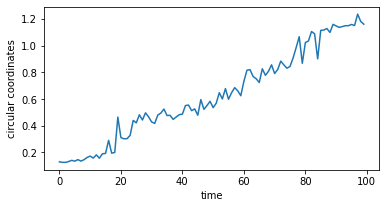

In [18]:
plt.figure(figsize=(6, 3))
plt.plot(Transforms.T_IM(c1))
plt.xlabel('time')
plt.ylabel('circular coordinates')
plt.savefig('metric_transform_1_after.png', bbox_inches='tight')

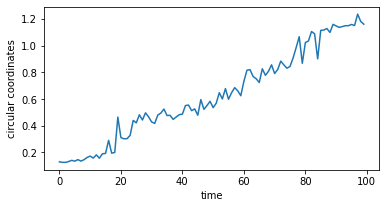

In [19]:
plt.figure(figsize=(6, 3))
plt.plot(Transforms.T_IM(c2))
plt.xlabel('time')
plt.ylabel('circular coordinates')
plt.savefig('metric_transform_2_after.png', bbox_inches='tight')

In [20]:
metrics.dtw(c1, c2)

5.261266565030792

In [21]:
Transforms.Phi(metrics.dtw)(c1, c2)

     fun: 1.0114613123884174e-15
    nfev: 32
     nit: 28
 success: True
       x: 0.0

In [22]:
Transforms.Phi(metrics.dtw)(c1, c1 + 0.5)

     fun: 1.4012695825904627e-08
    nfev: 26
     nit: 22
 success: True
       x: -0.49999999859873034

In [23]:
Transforms.Phi(metrics.ctw)(c1, c1 + 0.5)

     fun: 1.4012695825904627e-08
    nfev: 26
     nit: 22
 success: True
       x: -0.49999999859873034

## Old - other candidates for satisfying (3)

Any metric for two vectors applied with $T_{I} \circ T_{M}$ would satisfy (1) and (2). In other words, $c=c'\pmod1$ and $\tilde{c}=\tilde{c}'\pmod1$ then $d(T_{I} \circ T_{M}(c),T_{I} \circ T_{M}(\tilde{c}))=d(T_{I} \circ T_{M}(c'),T_{I} \circ T_{M}(\tilde{c}'))$,
if $c(t_{i+1})-c(t_{i})=-(c'(t_{i+1})-c'(t_{i}))$ for all $i$ then $d(T_{I} \circ T_{M}(c),T_{I} \circ T_{M}(c'))=0$.

In [24]:
metrics.dtw(c1, c2)

5.261266565030792

In [25]:
metrics.dtw(Transforms.T_IM(c1), Transforms.T_IM(c2))

1.0114613123884174e-15

Satisfying (3) is a bit more difficult.

In [26]:
metrics.dtw(Transforms.T_IM(c1), Transforms.T_IM(c1 + 0.5))

2.934967007748294

We thought of several options for how to handle the translation invariance:

1. Compare the circular coordinates $c$ to the circular coordinates $\tilde{c}+a$ for $a$ varying from $\min{c}-\min{\tilde{c}}$ to $\max{c}-\max{\tilde{c}}$. In other words, it is to add the offset before comparing two circular coordinates and return the minimum possible distance. Precisely, we define a transform $T_{L}$ as: 
$$
T_{L}(d)(c,\tilde{c})=\min_{\min{c}-\min{\tilde{c}}\leq a \leq \max{c}-\max{\tilde{c}}}d(c,\tilde{c}+a).
$$
This makes it a 1-dimensional optimization problem: just find the offset that minimizes the signal difference.

In [27]:
Transforms.T_L(metrics.dtw)(Transforms.T_IM(c1), Transforms.T_IM(c1 + 0.5))

     fun: 1.4012695825904627e-08
    nfev: 26
     nit: 22
 success: True
       x: -0.49999999859873034

In [28]:
Transforms.T_L(metrics.ctw)(Transforms.T_IM(c1), Transforms.T_IM(c1 + 0.5))

     fun: 1.4012695825904627e-08
    nfev: 26
     nit: 22
 success: True
       x: -0.49999999859873034

2. Compute c = c-c.mean() for each circular coordinates to try to mean-center them.

In [29]:
def T_C(c):
    cc = c.copy()
    return cc - cc.mean()

In [30]:
metrics.dtw(T_C(Transforms.T_IM(c1)), T_C(Transforms.T_IM(c1 + 0.5)))

9.453208419344607e-16

3. Embed both circular coordinates $c,c'$ to circles in $\mathbb{R}^{2}$. Compute the argument (i.e. angle from $x$-axis) for centroids of circular coordinates, i.e. $\arctan(mean(c))$, and then shift both signals by this centroid argument to align the signals.

In [31]:
def T_A(c):
    angle = np.arctan2(np.mean(np.sin(2 * np.pi * c)),
          np.mean(np.cos(2 * np.pi * c)))
    return (c - angle / (2 * np.pi)) % 1.

In [32]:
metrics.dtw(T_A(Transforms.T_IM(c1)), T_A(Transforms.T_IM(c1 + 0.5)))

1.2511578073120693e-15

# Old

## Old - Loading Data

In [33]:
np.random.seed(0)

In [34]:
epsilon = .01
X = np.zeros((150, 3))
X[:, 0] =  np.linspace(0, 2 * np.pi, num=150)
X[:, 1] = 2 * X[:, 0] + epsilon * np.random.normal(size=150)
# X[:, 1] = np.cos(7 * X[:, 0]) + epsilon * np.random.normal(size=150)
X[:, 2] = np.sin(7 * X[:, 0]) + epsilon * np.random.normal(size=150)

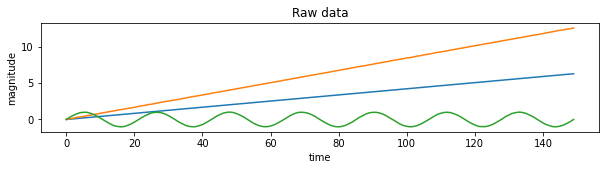

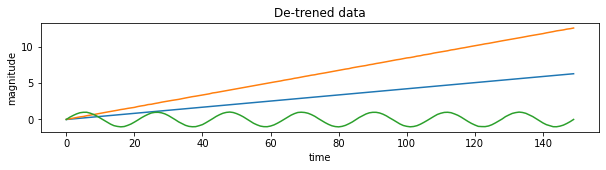

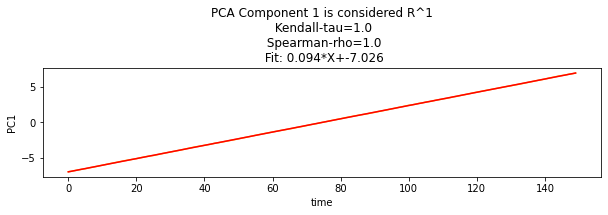

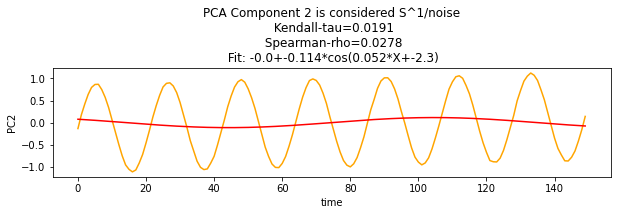

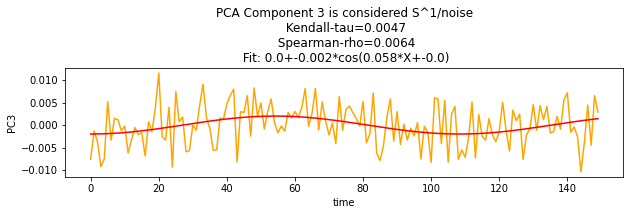

In [35]:
X_mixed = MixedCoordinates.MixedCoordinates(data_matrix=X, n_comp=3,
      detrend=False, get_fits=True)

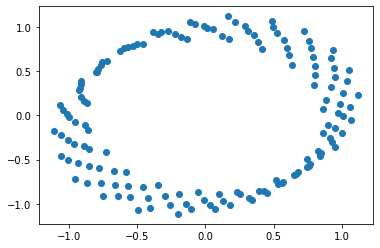

In [36]:
X_S = np.vstack((X_mixed['S1array'][0:145, 0], X_mixed['S1array'][5:150, 0])).T
plt.plot(X_S[:, 0], X_S[:, 1], 'o')

Output file: temp_output.pdf 

>>>>>>Start Time(VR computation): 2021-12-09 17:02:31
Base coefficient field: Z/23Z
Maximal scale: 2.0
Persistence threshold for selecting significant cocycles: 0.1
>>>>>>End Time (VR-computation): 2021-12-09 17:02:33


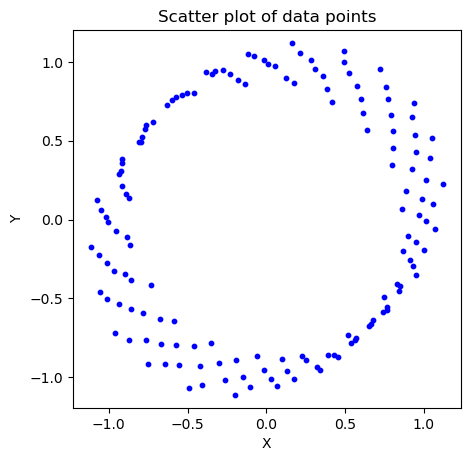

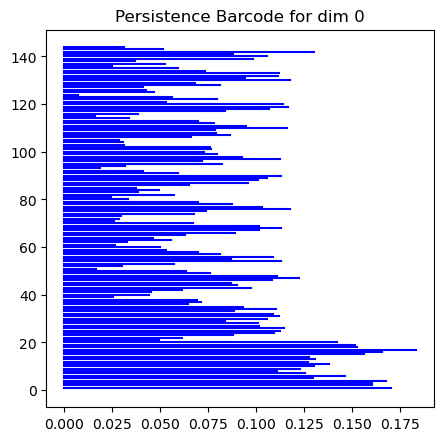

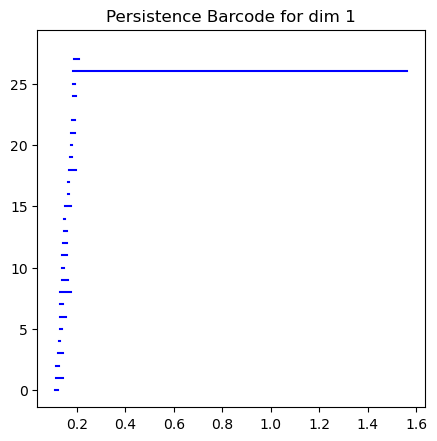

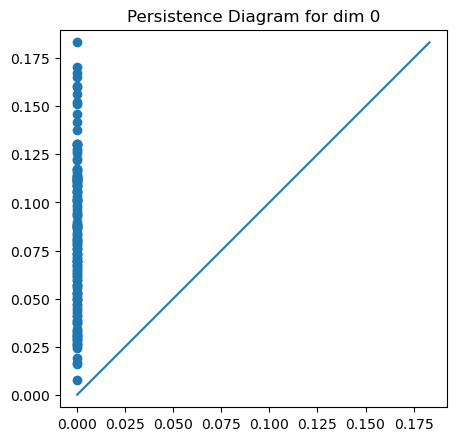

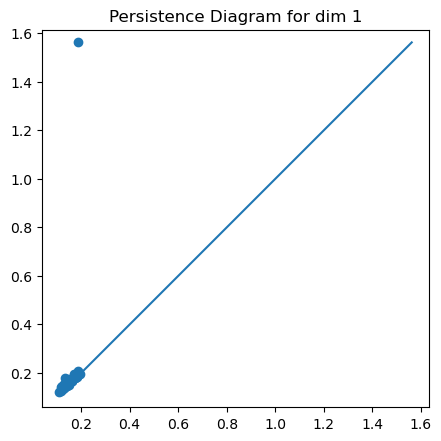

>>>>>>Selected significant features:
(0.185667,1.5629) 	persistence =  1.3772285878658295

Constant edges, with coordinates difference < 1e-05
Optimizer maximal iteration steps= 1000
>>>>>> Start Time (GCC computation): 2021-12-09 17:02:34
>>>>>> lambda =  0.5 . => Analysis of Circular coordinates 
 (mod 23 - 0.5*L2 + 0.5*L2)
Penalty function =>0.5*L^2+0.5*L^2
Before optim cost: 12.937567252955931
After  optim cost: 12.937567254323708  in  1000  steps
Penalty function =>0.5*L^2+0.5*L^2 Coordinates=>temp_CircularCoordinates_0.5_0.txt
Penalty function =>0.5*L^2+0.5*L^2 Embeddings=>temp_Embedding_0.5.txt
>>>>>> End Time (GCC computation): 2021-12-09 17:02:45


In [37]:
color, embedding = GCC2.GCC2(dataset = X_S,
    filenam = "temp",
    threshold = 0.1,
    maxscale = 2.,
    toll=1e-5,
    lp=2,
    lq=2,
    Nsteps=1000,
    lambda_list=[0.5])

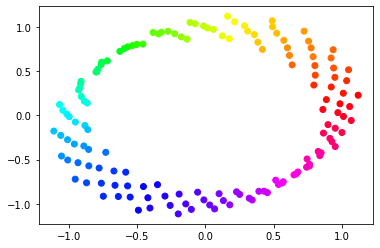

In [38]:
plt.scatter(X_S[:, 0], X_S[:, 1], c=color, cmap="hsv")

In [39]:
c1 = color
c2 = 2 * c1[0] - c1

Text(0, 0.5, 'circular coordinates')

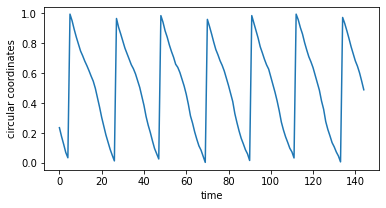

In [40]:
plt.figure(figsize=(6, 3))
plt.plot(c1)
plt.xlabel('time')
plt.ylabel('circular coordinates')
# plt.savefig('metric_transform_1_before.png', bbox_inches='tight')

Text(0, 0.5, 'circular coordinates')

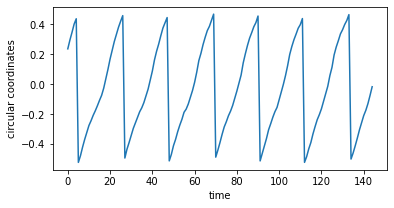

In [41]:
plt.figure(figsize=(6, 3))
plt.plot(c2)
plt.xlabel('time')
plt.ylabel('circular coordinates')
# plt.savefig('metric_transform_2_before.png', bbox_inches='tight')

Text(0, 0.5, 'circular coordinates')

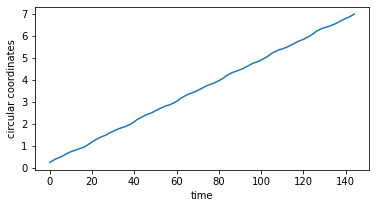

In [42]:
plt.figure(figsize=(6, 3))
plt.plot(Transforms.T_IM(c1))
plt.xlabel('time')
plt.ylabel('circular coordinates')
# plt.savefig('metric_transform_1_after.png', bbox_inches='tight')

Text(0, 0.5, 'circular coordinates')

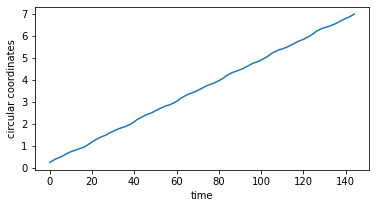

In [43]:
plt.figure(figsize=(6, 3))
plt.plot(Transforms.T_IM(c2))
plt.xlabel('time')
plt.ylabel('circular coordinates')
# plt.savefig('metric_transform_2_after.png', bbox_inches='tight')

In [44]:
metrics.dtw(c1, c2)

5.203693469254156

In [45]:
Transforms.T_L(metrics.dtw)(c1, c2)

     fun: 3.607774440695335
    nfev: 19
     nit: 15
 success: True
       x: 0.4043742507776733

In [46]:
Transforms.Phi(metrics.dtw)(c1, c2)

     fun: 3.510833468576701e-15
    nfev: 33
     nit: 29
 success: True
       x: 0.0

In [47]:
metrics.ctw(c1, c2)

5.203693469254156

In [48]:
Transforms.T_L(metrics.ctw)(c1, c2)

     fun: 3.607774440695335
    nfev: 19
     nit: 15
 success: True
       x: 0.4043742507776733

In [49]:
Transforms.Phi(metrics.ctw)(c1, c2)

     fun: 3.510833468576701e-15
    nfev: 33
     nit: 29
 success: True
       x: 0.0

## Old with ripser - Loading Data

In [50]:
from sklearn import decomposition

In [51]:
import scipy as spy
import ripser

In [52]:
def boundary_cocycles(rout, epsilon):
    # Construct 𝛿⁰
    prime = 23
    distances = rout["dperm2all"]
    edges = np.array((distances<=epsilon).nonzero()).T

    I = np.c_[np.arange(edges.shape[0]),np.arange(edges.shape[0])]
    I = I.flatten()
    J = edges.flatten()
    V = np.c_[-1 * np.ones(edges.shape[0]), np.ones(edges.shape[0])]
    V = V.flatten()

    Delta = spy.sparse.coo_matrix((V,(I,J)), shape=(edges.shape[0], distances.shape[0]))
    # Extract the cocycles
    cocycles = []
    for cocycle in rout["cocycles"][1]:
        val = cocycle[:,2]
        val[val > (prime-1)/2] -= prime
        Y = spy.sparse.coo_matrix((val,(cocycle[:,0],cocycle[:,1])), shape=(distances.shape[0],distances.shape[0]))
        Y = Y - Y.T
        Z = np.zeros((Delta.shape[0],))
        Z = Y[edges[:,0],edges[:,1]]
        cocycles.append(Z)
    return Delta,cocycles

In [53]:
def circular_coordinate(data):
    data = np.asarray(data)
    print(data.shape)

#    data = np.diff(data,n=1,axis=1)#Take the first-order difference along the axis 1.
#    print(data.shape)

    pca = decomposition.PCA(n_components=50)
    pca.fit(data)
    data = pca.transform(data)
    plt.plot(data[:,0],data[:,1])
    plt.scatter(data[:,0],data[:,1])
    plt.title('Leading 2 PCs (1-st order difference data).')
    plt.show
    print(data.shape)

    kut=0
    for i in range(50):
        if sum(pca.explained_variance_ratio_[:i])>.9:
            print(i+1)
            kut = i+1
            break
        elif pca.explained_variance_ratio_[i]-pca.explained_variance_ratio_[i+1]>.1:
            print(i+1)
            kut = i+1
            break    

    print(kut)
            
    prime=23
    data_ripser = ripser.ripser(data[:, kut:], coeff=prime, do_cocycles=True)

    fig=plt.figure()
    plt.scatter(*data_ripser["dgms"][1].T,s=10)
    # fig.gca().set_aspect('equal')
    # plt.plot((0,15),(0,15))
    plt.show()

    longest = np.diff(data_ripser["dgms"][1]).argmax()
    epsilon = data_ripser["dgms"][1][longest][0]+.01
    Delta, cocycles = boundary_cocycles(data_ripser, epsilon)

    for Z in cocycles:
        # Z = cocycles[longest]
        zDx = spy.sparse.linalg.lsqr(Delta, np.array(Z).squeeze())

    #     plt.scatter(*pca.components_[kut:kut+2],c=np.mod(np.array(zDx[0]), 1.0),cmap=cm.hsv)
        plt.scatter(range(len(zDx[0])),np.mod(np.array(zDx[0]), 1.0),c='C0',s=1)
        plt.scatter(range(len(zDx[0])),1+np.mod(np.array(zDx[0]), 1.0),c='C0',s=1)
        plt.scatter(range(len(zDx[0])),-1+np.mod(np.array(zDx[0]), 1.0),c='C0',s=1)
        plt.ylim(-.50,+.5)
    plt.show()
    Z = cocycles[longest]
    zDx = spy.sparse.linalg.lsqr(Delta, np.array(Z).squeeze())
    plt.scatter(data[:,0],data[:,1],c=np.mod(np.array(zDx[0]), 1.0),cmap=plt.cm.hsv,s=1)
    plt.axis('equal')
    plt.show()
    
    return data, zDx

(225, 68)
(225, 50)
1
1


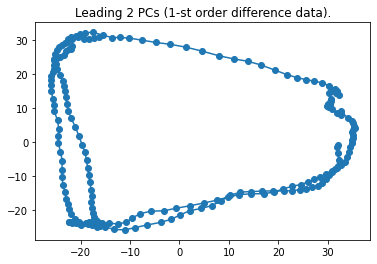

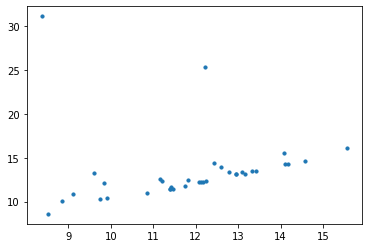

The exact solution is  x = 0                              
The exact solution is  x = 0                              
The exact solution is  x = 0                              
The exact solution is  x = 0                              
The exact solution is  x = 0                              
The exact solution is  x = 0                              
The exact solution is  x = 0                              
The exact solution is  x = 0                              
The exact solution is  x = 0                              
The exact solution is  x = 0                              
The exact solution is  x = 0                              
The exact solution is  x = 0                              
The exact solution is  x = 0                              
The exact solution is  x = 0                              
The exact solution is  x = 0                              
The exact solution is  x = 0                              
The exact solution is  x = 0                            

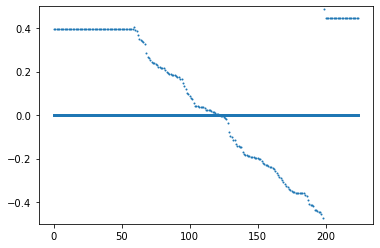

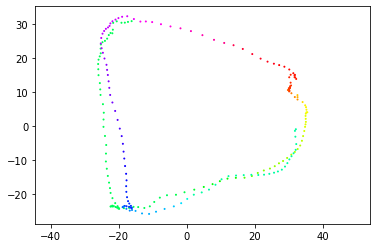

In [54]:
walking = np.genfromtxt('old/69_01.xy', delimiter=' ', dtype=None,
      encoding=None)
walking_pca, walking_zDx = circular_coordinate(walking)

(140, 68)
(140, 50)
2
2


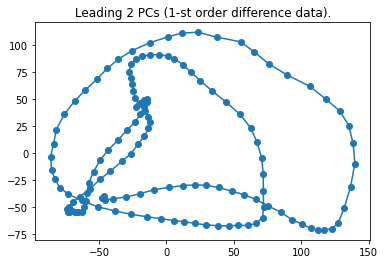

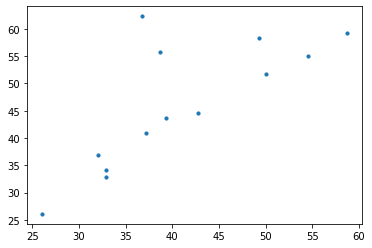

The exact solution is  x = 0                              
The exact solution is  x = 0                              
The exact solution is  x = 0                              
The exact solution is  x = 0                              
The exact solution is  x = 0                              
The exact solution is  x = 0                              
The exact solution is  x = 0                              
The exact solution is  x = 0                              


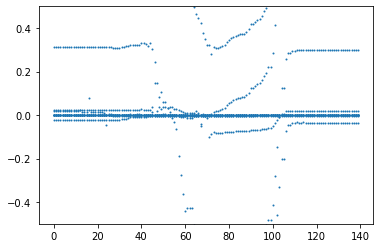

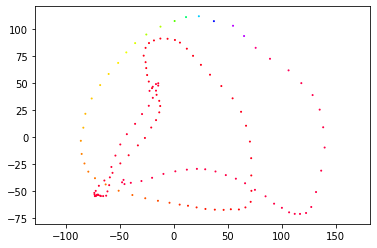

In [55]:
hopping = np.genfromtxt('old/143_05.xy', delimiter=' ', dtype=None,
      encoding=None)
hopping_pca, hopping_zDx = circular_coordinate(hopping)

## Old with ripser - Metrics of circular coordinates

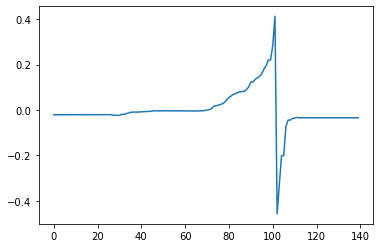

In [56]:
plt.plot(hopping_zDx[0])

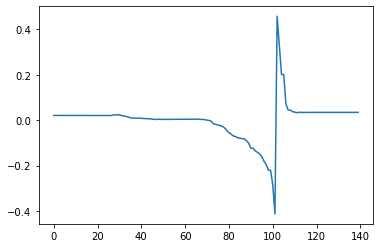

In [57]:
plt.plot(-hopping_zDx[0])

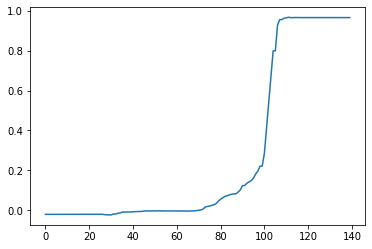

In [58]:
plt.plot(Transforms.T_IM(hopping_zDx[0]))

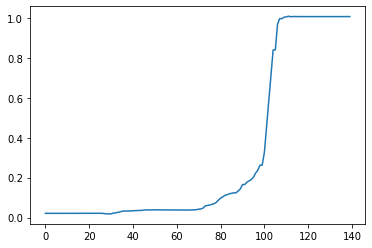

In [59]:
plt.plot(Transforms.T_IM(-hopping_zDx[0]))

In [60]:
metrics.dtw(walking_zDx[0], hopping_zDx[0])

4.666587155566798

In [61]:
metrics.dtw(Transforms.T_IM(walking_zDx[0]), Transforms.T_IM(hopping_zDx[0]))

4.459324131652019

Satisfying (2) is a bit more difficult.

In [62]:
metrics.dtw(Transforms.T_IM(walking_zDx[0]),
      Transforms.T_IM(walking_zDx[0] + 0.5))

5.5282470663558865

We thought of several options for how to handle the translation invariance:

1. Compare the circular coordinates $c$ to the circular coordinates $\tilde{c}+a$ for $a$ varying from $\min{c}-\min{\tilde{c}}$ to $\max{c}-\max{\tilde{c}}$.

In [63]:
Transforms.T_L(metrics.dtw)(walking_zDx[0], walking_zDx[0] + 0.5)

     fun: 3.1208491771520885e-08
    nfev: 26
     nit: 22
 success: True
       x: -0.4999999978637501

In [64]:
Transforms.T_L(metrics.dtw)(walking_zDx[0], hopping_zDx[0])

     fun: 4.542850688368416
    nfev: 16
     nit: 12
 success: True
       x: 0.07832457568178067

In [65]:
Transforms.Phi(metrics.dtw)(walking_zDx[0], walking_zDx[0] + 0.5)

     fun: 3.120849310056894e-08
    nfev: 26
     nit: 22
 success: True
       x: -0.49999999786375

In [66]:
Transforms.Phi(metrics.dtw)(walking_zDx[0], hopping_zDx[0])

     fun: 0.42848831131187753
    nfev: 19
     nit: 15
 success: True
       x: 0.39401819056866727

2. Compute c = c-c.mean() for each circular coordinates to try to mean-center them.

In [67]:
metrics.dtw(T_C(Transforms.T_IM(walking_zDx[0])),
      T_C(Transforms.T_IM(walking_zDx[0] + 0.5)))

3.2793890908915225e-15

In [68]:
metrics.dtw(T_C(Transforms.T_IM(walking_zDx[0])),
      T_C(Transforms.T_IM(hopping_zDx[0])))

1.2044953077618494

3. Embed both circular coordinates $c,c'$ to circles in $\mathbb{R}^{2}$. Compute the argument (i.e. angle from $x$-axis) for centroids of circular coordinates, i.e. $\arctan(mean(c))$, and then shift both signals by this centroid argument to align the signals.

In [69]:
metrics.dtw(T_A(Transforms.T_IM(walking_zDx[0])),
      T_A(Transforms.T_IM(walking_zDx[0] + 0.5)))

3.0211532884711406e-15

In [70]:
metrics.dtw(T_A(Transforms.T_IM(walking_zDx[0])),
      T_A(Transforms.T_IM(hopping_zDx[0])))

8.078003369451682